# Importing Libraries

In [174]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.spatial import ConvexHull
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [177]:
wine = pd.read_csv("winequality-red.csv")
print("Successfully Imported Data!")
wine.head()

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [179]:
print(wine.shape)

(1599, 12)


# Description

In [182]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Finding Null Values

In [185]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [187]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [189]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Analysis

## KDE plot:

<Axes: xlabel='quality', ylabel='Density'>

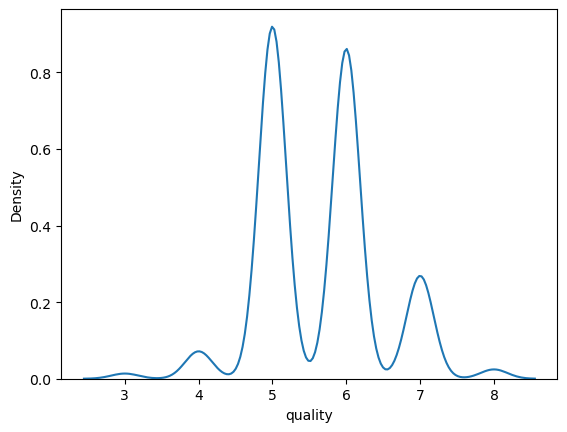

In [193]:
sns.kdeplot(wine.query('quality > 2').quality)

## Distplot:

<Axes: xlabel='alcohol', ylabel='Density'>

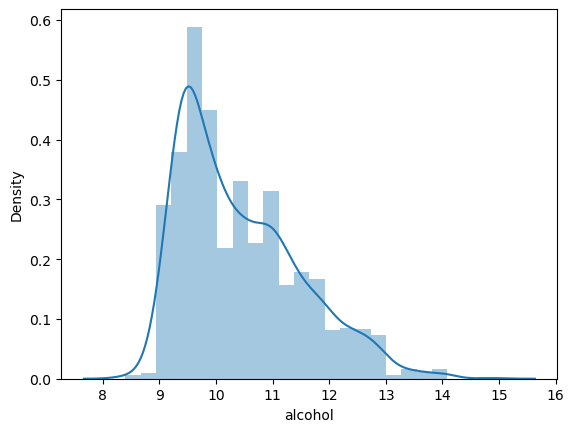

In [196]:
sns.distplot(wine['alcohol'])

## Histogram

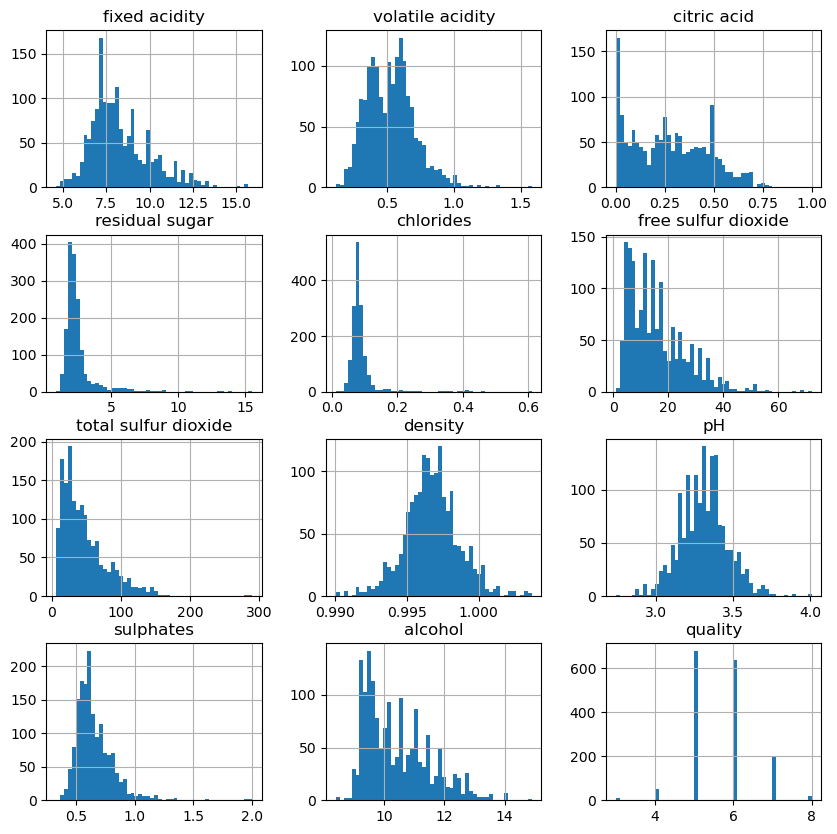

In [201]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

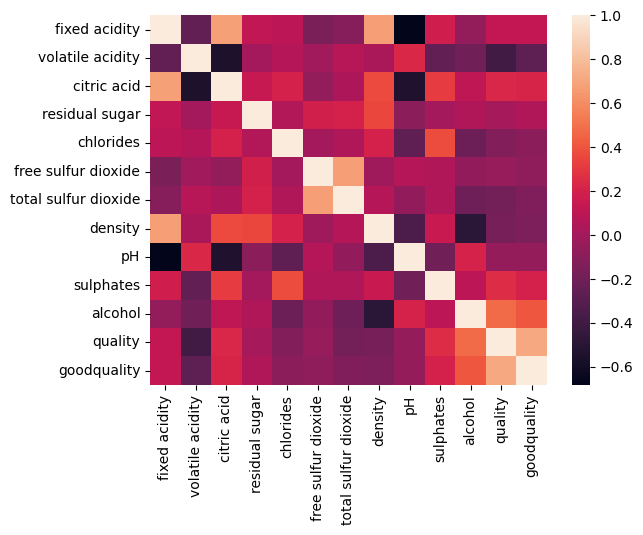

In [251]:
corr = wine.corr()

 # Adjust the figure size
sns.heatmap(corr, annot=False)
plt.show()

## Violinplot:

<Axes: xlabel='quality', ylabel='alcohol'>

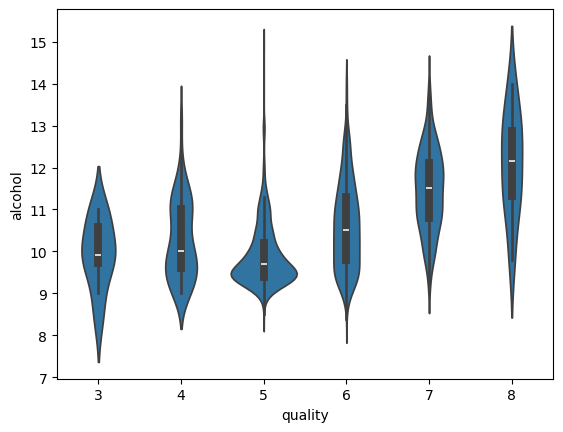

In [206]:
sns.violinplot(x='quality', y='alcohol', data=wine)

# Feature Selection

In [209]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [212]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [214]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [216]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance

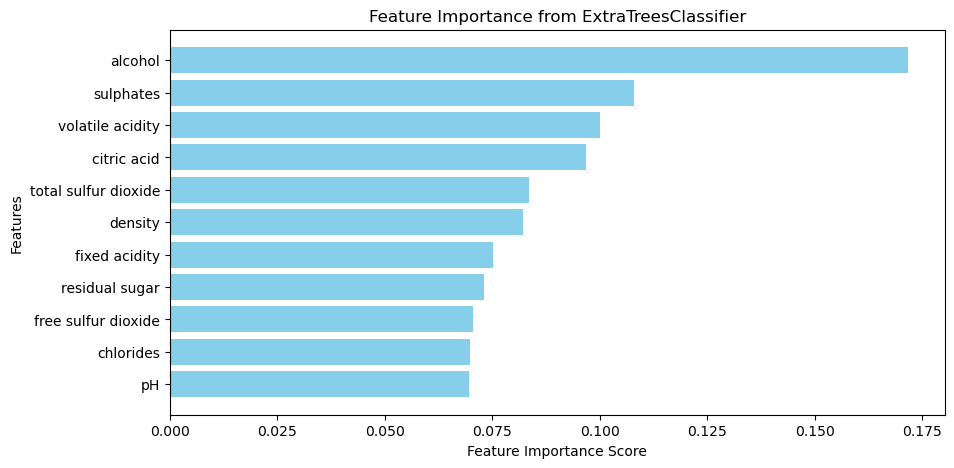

In [243]:
import matplotlib.pyplot as plt
import numpy as np

# Fit ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X, Y)

# Get feature importance scores
feature_importance = classifiern.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importance, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from ExtraTreesClassifier")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


# Splitting Dataset

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [224]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score



# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=7),
    "GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}
print("\n")
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(Y_test, Y_pred)
    
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])

# Sort by Accuracy Score (Descending)
accuracy_df = accuracy_df.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(accuracy_df)
print("\n")
# Define interpretability factors
complexity_scores = {
    "Logistic Regression": 5,
    "Decision Tree": 4,
    "GaussianNB": 5,
    "KNN": 2,
    "SVC": 1,
    "Random Forest": 2,
    "XGBoost": 1,
}

explainability_scores = {
    "Logistic Regression": 5,
    "Decision Tree": 5,
    "GaussianNB": 4,
    "KNN": 3,
    "SVC": 2,
    "Random Forest": 3,
    "XGBoost": 2,
}

# Compute feature usage score
feature_usage_scores = {}
for name, model in models.items():
    try:
        active_features = np.count_nonzero(model.coef_) if hasattr(model, "coef_") else np.count_nonzero(model.feature_importances_)
    except AttributeError:
        active_features = X_train.shape[1]  # Assume all features are used
    feature_usage_scores[name] = 1 - (active_features / X_train.shape[1])  # Normalize to 0-1 scale

# Define weights
w1, w2, w3 = 0.5, 0.3, 0.2

# Compute interpretability scores
interpretability_scores = {}
for name in models.keys():
    S = (w1 * complexity_scores[name]) + (w2 * feature_usage_scores[name]) + (w3 * explainability_scores[name])
    interpretability_scores[name] = round(S, 3)

from tabulate import tabulate

# Create result DataFrame
results = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy Score': [accuracy_scores[m] for m in models.keys()],
    'Interpretability Score': [interpretability_scores[m] for m in models.keys()]
})

# Sort by Accuracy Score
result_df = results.sort_values(by='Accuracy Score', ascending=False).set_index('Model')

# Print the table in a formatted way
print(tabulate(result_df, headers='keys', tablefmt='pretty'))



                 Model  Accuracy Score
0        Random Forest        0.893750
1              XGBoost        0.889583
2  Logistic Regression        0.879167
3                  KNN        0.872917
4                  SVC        0.868750
5        Decision Tree        0.864583
6           GaussianNB        0.833333


+---------------------+--------------------+------------------------+
|        Model        |   Accuracy Score   | Interpretability Score |
+---------------------+--------------------+------------------------+
|    Random Forest    |      0.89375       |          1.6           |
|       XGBoost       | 0.8895833333333333 |          0.9           |
| Logistic Regression | 0.8791666666666667 |          3.5           |
|         KNN         | 0.8729166666666667 |          1.6           |
|         SVC         |      0.86875       |          0.9           |
|    Decision Tree    | 0.8645833333333334 |          3.0           |
|     GaussianNB      | 0.8333333333333334 |          

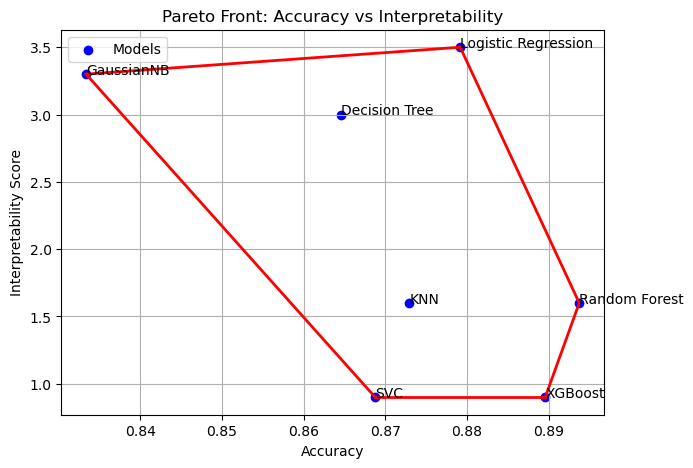


Best Trade-off Model:
Model               Random Forest
Accuracy                  0.89375
Interpretability              1.6
Name: 5, dtype: object
Computing SHAP values for the best model: Random Forest
SHAP Summary Plot for Random Forest


<Figure size 640x480 with 0 Axes>

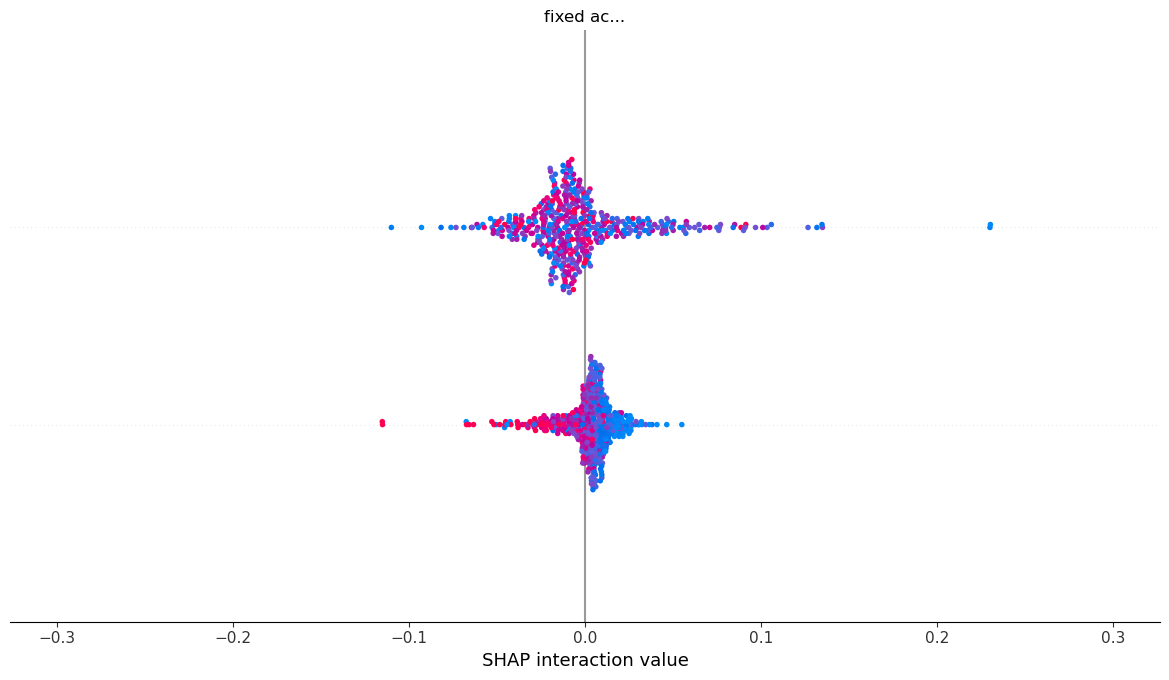

In [272]:

# Create DataFrame
results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_scores[m] for m in models.keys()],
    "Interpretability": [interpretability_scores[m] for m in models.keys()]
})

# Find Pareto Front (Trade-off Curve)
points = results[['Accuracy', 'Interpretability']].values
pareto_front = ConvexHull(points)

# Plot Accuracy vs Interpretability (Pareto Front)
plt.figure(figsize=(7, 5))
plt.scatter(results["Accuracy"], results["Interpretability"], color="blue", label="Models")

# Highlight Pareto-optimal points
for simplex in pareto_front.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "r-", lw=2)

for i, txt in enumerate(results["Model"]):
    plt.annotate(txt, (results["Accuracy"][i], results["Interpretability"][i]))

plt.xlabel("Accuracy")
plt.ylabel("Interpretability Score")
plt.title("Pareto Front: Accuracy vs Interpretability")
plt.legend()
plt.grid()
plt.show()

# Best Model based on Pareto Optimization
pareto_models = results.iloc[pareto_front.vertices]
best_tradeoff_model = pareto_models.sort_values(by=["Accuracy"], ascending=False).iloc[0]
print("\nBest Trade-off Model:")
print(best_tradeoff_model)
best_model_name = best_tradeoff_model["Model"]
best_model = models[best_model_name]  # Retrieve the model

print(f"Computing SHAP values for the best model: {best_model_name}")

# SHAP Explainer for different models
if best_model_name == "Logistic Regression":
    # Logistic Regression uses LinearExplainer
    explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_test)

elif best_model_name in ["Random Forest", "Decision Tree", "XGBoost"]:
    # Tree-based models use TreeExplainer
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

else:  # For KNN, SVC, Naïve Bayes → Use KernelExplainer
    # Approximate using a sample
    explainer = shap.KernelExplainer(best_model.predict, shap.sample(X_train, 100))  
    shap_values = explainer.shap_values(X_test[:100])  # Reducing computation time

# SHAP Summary Plot (All features)
print(f"SHAP Summary Plot for {best_model_name}")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)




Accuracy: 0.894
Precision: 0.611
Recall: 0.524
F1 Score: 0.564
AUC-ROC Score: 0.737
[[392  25]
 [ 28  35]]


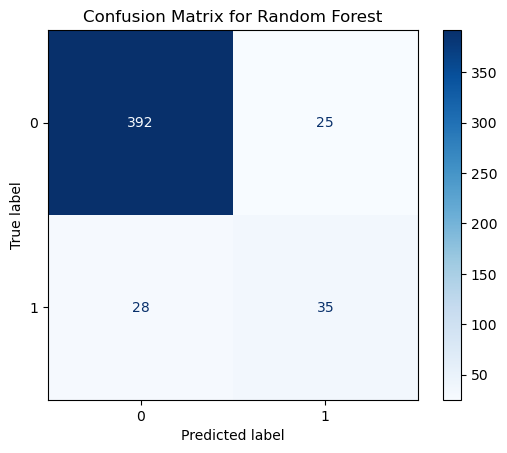

In [276]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions for the best trade-off model
Y_pred_best = best_model.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(Y_test, Y_pred_best)
precision = precision_score(Y_test, Y_pred_best)
recall = recall_score(Y_test, Y_pred_best)
f1 = f1_score(Y_test, Y_pred_best)
roc_auc = roc_auc_score(Y_test, Y_pred_best)

# Display Results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC-ROC Score: {roc_auc:.3f}")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
disp.plot(cmap="Blues", values_format="d")

plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()



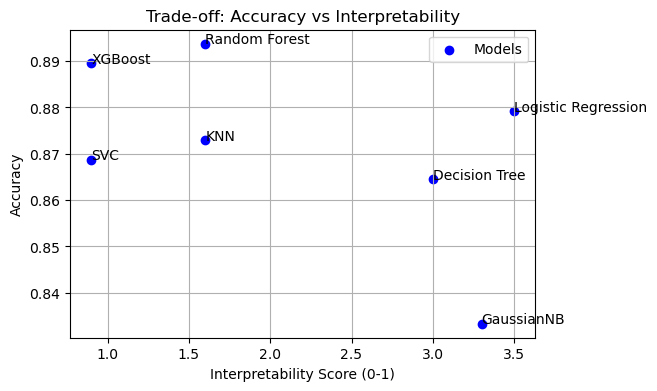

In [227]:
interpretability_values = list(interpretability_scores.values())
accuracy_values = list(accuracy_scores.values())

# Scatter Plot: Accuracy vs Interpretability
plt.figure(figsize=(6, 4))
plt.scatter(interpretability_values, accuracy_values, color="blue", label="Models")

# Add model names as annotations
for i, model_name in enumerate(accuracy_scores.keys()):
    plt.annotate(model_name, (interpretability_values[i], accuracy_values[i]))

plt.xlabel("Interpretability Score (0-1)")
plt.ylabel("Accuracy")
plt.title("Trade-off: Accuracy vs Interpretability")
plt.legend()
plt.grid()
plt.show()